In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         12.5577 (11.7332, 13.4106) (11.7055, 13.3749)  1.6694 (Jnode 106)\n',
 't_n56         12.4476 (11.6546, 13.2661) (11.6503, 13.2579)  1.6075 (Jnode 105)\n',
 't_n57         11.7875 (11.0496, 12.5480) (11.0529, 12.5499)  1.4970 (Jnode 104)\n',
 't_n58         10.4287 ( 9.8149, 11.0513) ( 9.8133, 11.0491)  1.2358 (Jnode 103)\n',
 't_n59         10.0666 ( 9.4617, 10.6813) ( 9.4807, 10.6962)  1.2155 (Jnode 102)\n',
 't_n60          9.5912 ( 8.9920, 10.1928) ( 8.9970, 10.1967)  1.1997 (Jnode 101)\n',
 't_n61          8.9381 ( 8.3421,  9.5400) ( 8.3327,  9.5284)  1.1957 (Jnode 100)\n',
 't_n62          4.7693 ( 4.0566,  5.3935) ( 4.0515,  5.3881)  1.3365 (Jnode 99)\n',
 't_n63          4.9422 ( 4.5586,  5.3465) ( 4.5412,  5.3244)  0.7833 (Jnode 98)\n',
 't_n64          2.9350 ( 2.6612,  3.2275) ( 2.6564,  3.2213)  0.5648 (Jnode 97)\n',
 't_n65          2.5876 ( 2.3419,  2.8511) ( 2.3253,  2.8332)  0.5080 (Jnode 96)\n',
 't_n66          2.0465 ( 1.8468,  2.2633) ( 1.8467,  2.26

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[12.5577,
 12.4476,
 11.7875,
 10.4287,
 10.0666,
 9.5912,
 8.9381,
 4.7693,
 4.9422,
 2.935,
 2.5876,
 2.0465,
 1.4589,
 1.0318,
 0.6232,
 3.7875,
 9.7823,
 9.4531,
 8.7276,
 6.1734,
 5.5516,
 5.1263,
 9.6655,
 9.2362,
 8.8686,
 8.2867,
 7.6329,
 7.4212,
 6.6089,
 6.0278,
 5.5161,
 4.1336,
 3.7825,
 6.4605,
 5.076,
 9.4411,
 2.3936,
 9.1811,
 8.4567,
 7.3988,
 6.8162,
 4.9521,
 5.4503,
 7.1377,
 6.8409,
 6.3628,
 4.7434,
 6.8756,
 10.3807,
 5.8194,
 3.3195,
 3.903,
 7.5899]

In [7]:
lower_ci_iqtree

[3.4106,
 3.2661,
 2.548,
 0.8149,
 0.4617,
 0.992,
 0.3421,
 0.0566,
 0.5586,
 0.6612,
 0.3419,
 0.8468,
 0.319,
 0.9373,
 0.614,
 0.5892,
 0.1763,
 0.8301,
 0.1465,
 0.5547,
 0.9544,
 0.0457,
 0.1009,
 0.6783,
 0.3185,
 0.7603,
 0.1466,
 0.9342,
 0.1391,
 0.5683,
 0.0523,
 0.6935,
 0.3523,
 0.9823,
 0.6659,
 0.8829,
 0.9644,
 0.6383,
 0.9584,
 0.9723,
 0.4338,
 0.3664,
 0.2673,
 0.5888,
 0.294,
 0.8029,
 0.0315,
 0.2443,
 0.5875,
 0.993,
 0.635,
 0.3352,
 0.4984]

In [8]:
upper_ci_iqtree

[11.7055,
 11.6503,
 11.0529,
 11.0513,
 10.6813,
 10.1928,
 9.54,
 5.3935,
 5.3465,
 3.2275,
 2.8511,
 2.2633,
 1.614,
 1.1421,
 0.6452,
 4.1646,
 10.3875,
 10.0893,
 9.3213,
 6.8352,
 6.2106,
 5.3661,
 10.236,
 9.7891,
 9.4078,
 8.7959,
 8.1065,
 7.8862,
 7.0512,
 6.4524,
 5.925,
 4.4942,
 4.1266,
 6.9131,
 5.3389,
 10.0067,
 2.8801,
 9.7393,
 8.9748,
 7.8533,
 7.2253,
 5.4342,
 5.5574,
 7.6828,
 7.3878,
 6.9213,
 5.3407,
 7.4989,
 11.1858,
 6.7716,
 4.024,
 4.5355,
 8.7171]

In [9]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

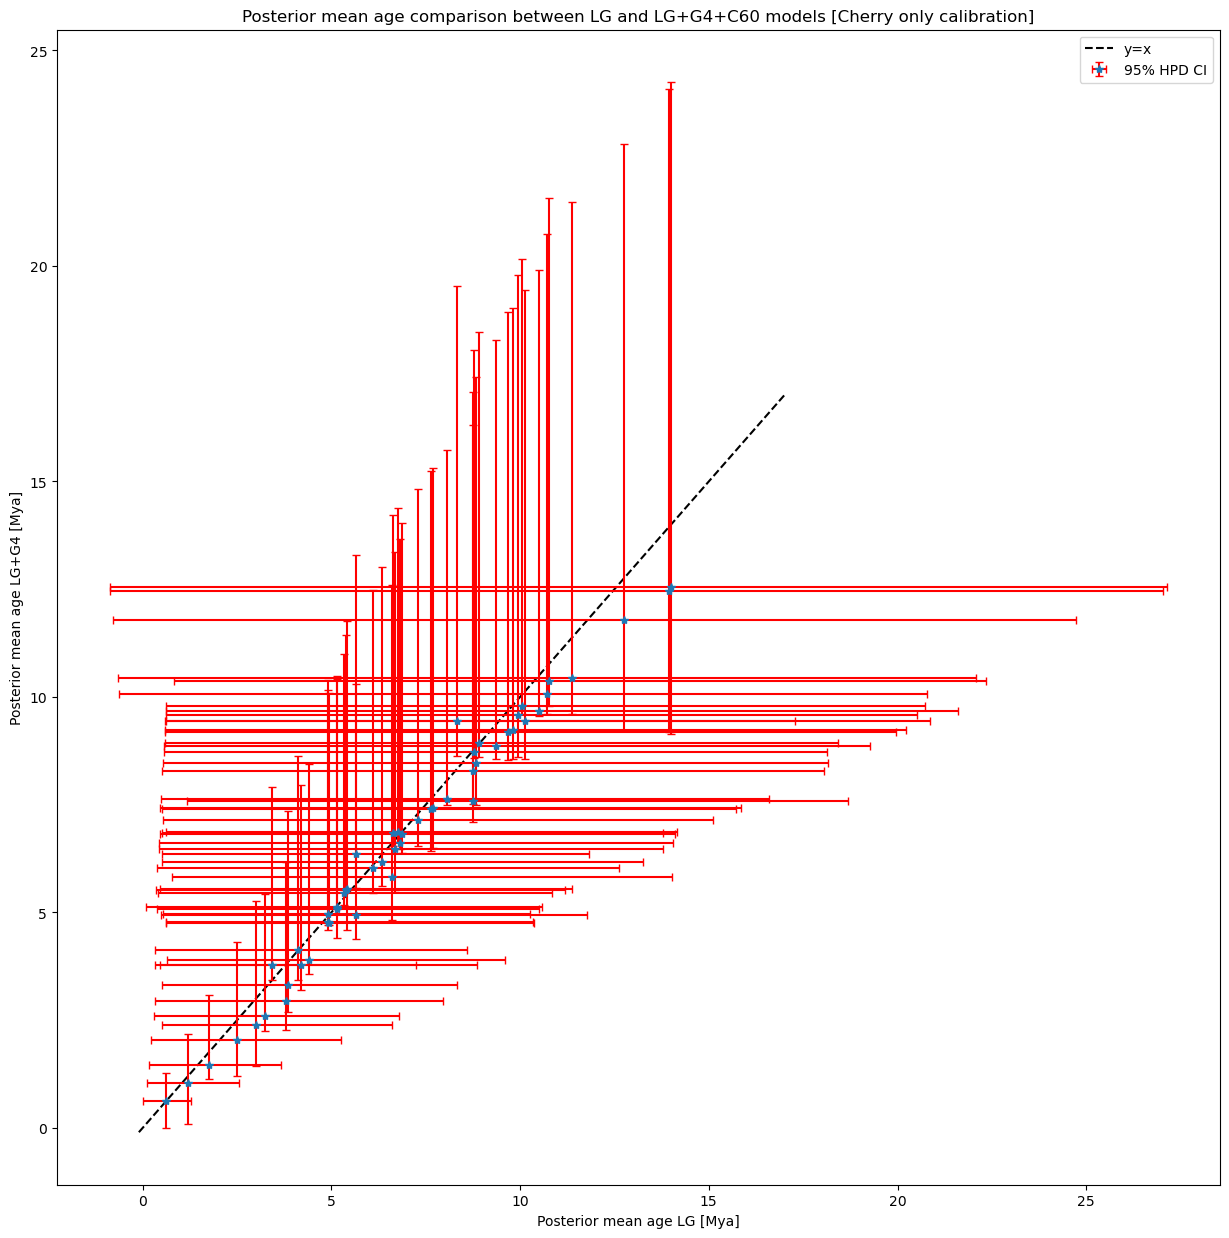

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_co.png')

In [11]:
posterior_mean_baseml

[13.9988,
 13.9558,
 12.7637,
 11.3852,
 10.7122,
 9.9448,
 8.9104,
 4.9138,
 5.6452,
 3.8089,
 3.2353,
 2.5026,
 1.7483,
 1.2073,
 0.6258,
 4.1995,
 10.05,
 8.3269,
 8.777,
 6.34,
 5.4093,
 5.1448,
 10.5017,
 9.8248,
 9.359,
 8.7646,
 8.0594,
 7.6899,
 6.8079,
 6.0939,
 5.3998,
 4.1114,
 3.4395,
 6.6803,
 5.1469,
 10.1285,
 2.9979,
 9.6924,
 8.8198,
 7.6428,
 6.86,
 4.9222,
 5.3282,
 7.3056,
 6.6422,
 5.6528,
 4.9361,
 6.7745,
 10.7545,
 6.5998,
 3.8584,
 4.3969,
 8.7525]

In [12]:
posterior_mean_iqtree

[12.5577,
 12.4476,
 11.7875,
 10.4287,
 10.0666,
 9.5912,
 8.9381,
 4.7693,
 4.9422,
 2.935,
 2.5876,
 2.0465,
 1.4589,
 1.0318,
 0.6232,
 3.7875,
 9.7823,
 9.4531,
 8.7276,
 6.1734,
 5.5516,
 5.1263,
 9.6655,
 9.2362,
 8.8686,
 8.2867,
 7.6329,
 7.4212,
 6.6089,
 6.0278,
 5.5161,
 4.1336,
 3.7825,
 6.4605,
 5.076,
 9.4411,
 2.3936,
 9.1811,
 8.4567,
 7.3988,
 6.8162,
 4.9521,
 5.4503,
 7.1377,
 6.8409,
 6.3628,
 4.7434,
 6.8756,
 10.3807,
 5.8194,
 3.3195,
 3.903,
 7.5899]

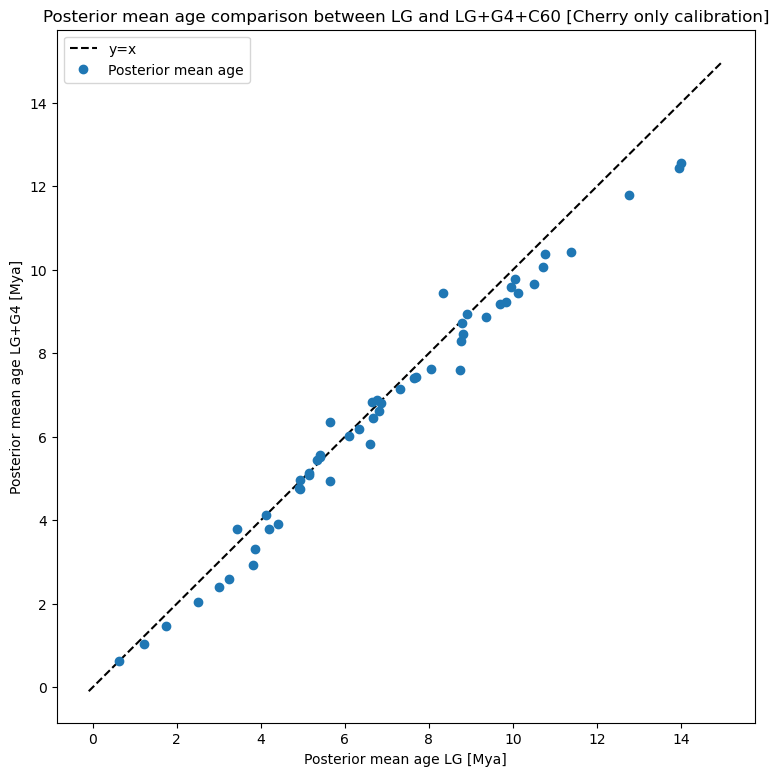

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_co_scatter.png')